In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models,datasets,layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train,y_train),(X_test,y_test) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 45s 0us/step


In [3]:
type(X_train)

numpy.ndarray

[[[158 112  49]
  [159 111  47]
  [165 116  51]
  ...
  [137  95  36]
  [126  91  36]
  [116  85  33]]

 [[152 112  51]
  [151 110  40]
  [159 114  45]
  ...
  [136  95  31]
  [125  91  32]
  [119  88  34]]

 [[151 110  47]
  [151 109  33]
  [158 111  36]
  ...
  [139  98  34]
  [130  95  34]
  [120  89  33]]

 ...

 [[ 68 124 177]
  [ 42 100 148]
  [ 31  88 137]
  ...
  [ 38  97 146]
  [ 13  64 108]
  [ 40  85 127]]

 [[ 61 116 168]
  [ 49 102 148]
  [ 35  85 132]
  ...
  [ 26  82 130]
  [ 29  82 126]
  [ 20  64 107]]

 [[ 54 107 160]
  [ 56 105 149]
  [ 45  89 132]
  ...
  [ 24  77 124]
  [ 34  84 129]
  [ 21  67 110]]]


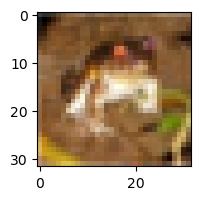

In [4]:
plt.figure(figsize=(2,2))
plt.imshow(X_train[0])
print(X_test[0])

In [5]:
X_train[0].shape

(32, 32, 3)

In [6]:
X_train = X_train/255.0
X_test = X_test/255.0

In [7]:
cifar_cnn = models.Sequential([
    layers.Conv2D(filters=64,kernel_size=(3,3),input_shape=(32,32,3),activation='relu'),
    layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,3),activation='relu'),
    
    layers.Flatten(),
    layers.Dense(32,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [8]:
cifar_cnn.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
hist = cifar_cnn.fit(X_train,y_train,epochs=5,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/5
1563/1563 [==============================] - 76s 49ms/step - loss: 1.3867 - accuracy: 0.5019 - val_loss: 1.2128 - val_accuracy: 0.5705
Epoch 2/5
1563/1563 [==============================] - 78s 50ms/step - loss: 1.1143 - accuracy: 0.6083 - val_loss: 1.1056 - val_accuracy: 0.6099
Epoch 3/5
1563/1563 [==============================] - 77s 49ms/step - loss: 0.9663 - accuracy: 0.6593 - val_loss: 1.0816 - val_accuracy: 0.6209
Epoch 4/5
1563/1563 [==============================] - 77s 49ms/step - loss: 0.8571 - accuracy: 0.7000 - val_loss: 1.0649 - val_accuracy: 0.6373
Epoch 5/5
1563/1563 [==============================] - 77s 49ms/step - loss: 0.7608 - accuracy: 0.7340 - val_loss: 1.0983 - val_accuracy: 0.6324


In [11]:
cifar_cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 1.0983 - accuracy: 0.6324


[1.0982890129089355, 0.6323999762535095]

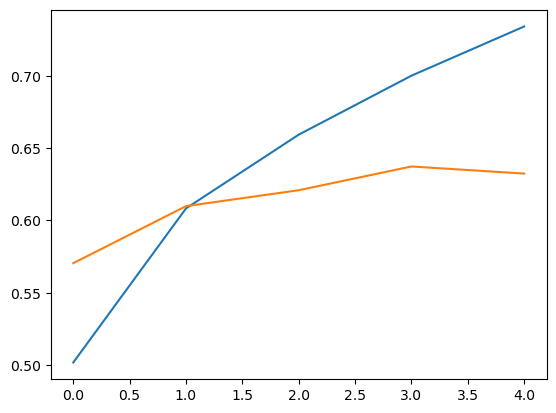

In [12]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])


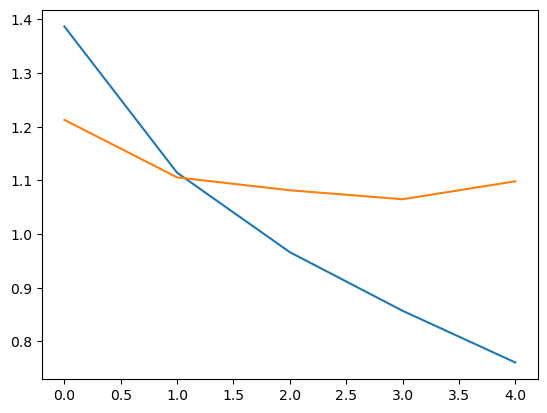

In [13]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])


In [14]:
hist.history['accuracy']

[0.5019199848175049,
 0.6083199977874756,
 0.659280002117157,
 0.7000200152397156,
 0.734000027179718]

# lENET CNN

In [15]:
lenet = models.Sequential([
    layers.Conv2D(filters=64,kernel_size=(5,5),input_shape=(32,32,3),activation='relu'),
    layers.MaxPool2D((2,2),strides=2),
    
    layers.Conv2D(filters=16,kernel_size=(5,5),padding='same',strides=1,activation='relu'),
    layers.MaxPool2D((2,2),strides=2),
    
    layers.Flatten(),
    layers.Dense(120,activation='relu'),
    layers.Dense(84,activation='relu'),
    
    
    layers.Dense(10,activation='softmax')
])

In [16]:
lenet.compile(
    
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
    
    
)

In [17]:
hist_lenet = lenet.fit(X_train,y_train,epochs=5,batch_size=64,validation_data=(X_test,y_test))

Epoch 1/5
782/782 [==============================] - 51s 64ms/step - loss: 1.5473 - accuracy: 0.4382 - val_loss: 1.3090 - val_accuracy: 0.5296
Epoch 2/5
782/782 [==============================] - 50s 63ms/step - loss: 1.2224 - accuracy: 0.5641 - val_loss: 1.1460 - val_accuracy: 0.5973
Epoch 3/5
782/782 [==============================] - 52s 66ms/step - loss: 1.0697 - accuracy: 0.6228 - val_loss: 1.0767 - val_accuracy: 0.6237
Epoch 4/5
782/782 [==============================] - 51s 65ms/step - loss: 0.9637 - accuracy: 0.6630 - val_loss: 1.0637 - val_accuracy: 0.6307
Epoch 5/5
782/782 [==============================] - 52s 66ms/step - loss: 0.8837 - accuracy: 0.6892 - val_loss: 0.9594 - val_accuracy: 0.6667


In [18]:
lenet.evaluate(X_test,y_test)

313/313 [==============================] - 3s 11ms/step - loss: 0.9594 - accuracy: 0.6667


[0.9593653082847595, 0.666700005531311]

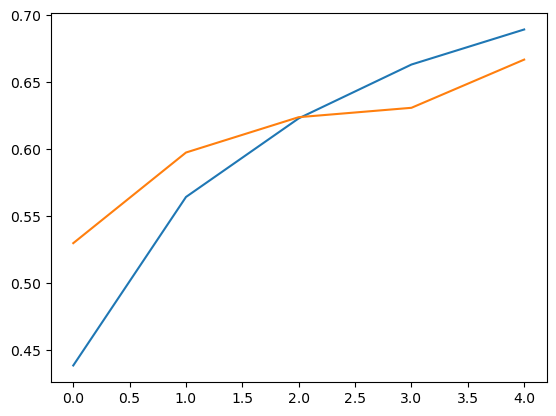

In [19]:
plt.plot(hist_lenet.history['accuracy'])
plt.plot(hist_lenet.history['val_accuracy'])


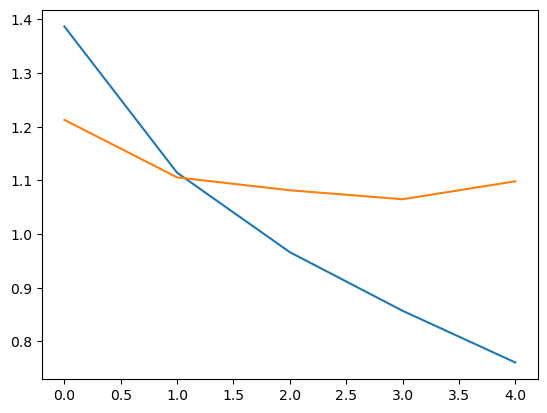

In [20]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])


In [2]:
tf.config.experimental.list_physical_devices()


[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [9]:

tf.__version__

'2.13.0'